### Building Chatbot With Multiple Tools Using Langgraph

#### Aim
Create a chatbot with tool capabilities from Pubmed, wikipedia search and some functions

In [41]:
from langchain_community.tools.pubmed.tool import PubmedQueryRun
Pubmed = PubmedQueryRun()
Pubmed.invoke("what is diabetes?")

'Published: 2025-11-07\nTitle: Newborn hearing screening in gestational diabetes mellitus: A comparative study of GDMA1 and GDMA2.\nCopyright Information: Copyright © 2025 Elsevier B.V. All rights reserved.\nSummary::\nAIM: Gestational diabetes mellitus (GDM) is a common metabolic disorder that affects both maternal and fetal health, with potential long-term complications. While its impact on neonatal outcomes is well-documented, its association with newborn hearing loss remains unclear. This study aims to evaluate the relationship between GDM subtypes-diet-controlled (GDMA1) and insulin-treated (GDMA2) -and newborn hearing screening results, emphasizing the need for targeted public health interventions.\nMATERIALS AND METHODS: This retrospective study included pregnancy records from Kartal Dr. Lütfi Kırdar City Hospital. Pregnant women were categorized into three groups: healthy pregnancies (n\xa0=\xa0282), GDMA1 (n\xa0=\xa0140), and GDMA2 (n\xa0=\xa068). Hearing screening was perform

In [42]:

from langchain_community.tools import WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper
api_wrapper_wiki=WikipediaAPIWrapper(top_k_results=1,doc_content_chars_max=500)
wiki=WikipediaQueryRun(api_wrapper=api_wrapper_wiki)
wiki.name

'wikipedia'

In [43]:
wiki.invoke("What is machine learning")

'Page: Machine learning\nSummary: Machine learning (ML) is a field of study in artificial intelligence concerned with the development and study of statistical algorithms that can learn from data and generalise to unseen data, and thus perform tasks without explicit instructions. Within a subdiscipline in machine learning, advances in the field of deep learning have allowed neural networks, a class of statistical algorithms, to surpass many previous machine learning approaches in performance.\nML fi'

In [44]:
from dotenv import load_dotenv
load_dotenv()

import os

os.environ["TAVILY_API_KEY"]=os.getenv("TAVILY_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")

In [45]:
from langchain_tavily import TavilySearch
tavily = TavilySearch()

In [46]:
tavily.invoke("Provide me the recent AI news for 11th November 2025")

{'query': 'Provide me the recent AI news for 11th November 2025',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'url': 'https://radicaldatascience.wordpress.com/2025/11/07/ai-news-briefs-bulletin-board-for-november-2025/',
   'title': 'AI News Briefs BULLETIN BOARD for November 2025',
   'content': '[11/3/2025] Gen AI fast-tracks into the enterprise – Generative AI has become mainstream in the enterprise, with widespread workplace adoption',
   'score': 0.8652358,
   'raw_content': None},
  {'url': 'https://www.youtube.com/watch?v=73_WNxa8boA',
   'title': 'EP 452 | November 11 | AI 2025: Turning Innovation into ...',
   'content': 'EP 452 | November 11 | AI 2025: Turning Innovation into Income | Daily AI News from GAI Insights · Comments.',
   'score': 0.8252664,
   'raw_content': None},
  {'url': 'https://www.nature.com/articles/d41586-025-03643-y',
   'title': 'Ethically sourced image data set encourages fairness in AI ...',
   'content': 'NEWS AND VIEW

In [47]:
# Combine all the tools in the list

tools=[Pubmed,wiki,tavily]

In [48]:
# Initialize my LLM model

from langchain_groq import ChatGroq

llm1=ChatGroq(model="qwen/qwen3-32b")
llm2=ChatGroq(model="llama-3.1-8b-instant")

llm1_with_tools=llm1.bind_tools(tools)
llm2_with_tools=llm2.bind_tools(tools)

In [49]:
from pprint import pprint
from langchain_core.messages import AIMessage, HumanMessage
llm1_with_tools.invoke([HumanMessage(content=f"What is the recent AI News")])

AIMessage(content='', additional_kwargs={'reasoning_content': 'Okay, the user is asking for recent AI news. Let me see which tool to use. The available tools are PubMed, Wikipedia, and Tavily Search. Since they want recent news, Tavily Search seems appropriate because it\'s optimized for current events. PubMed is for biomedical literature, and Wikipedia is for general knowledge, so those aren\'t the best fits here.\n\nNow, looking at the parameters for Tavily Search. The user mentioned "recent," so I should set the time_range to "day" or "week" to get the latest articles. Let\'s go with "day" to get the most up-to-date news. The topic parameter should be "news" since it\'s about current events. I\'ll leave include_images as false unless the user specifically asks for images, which they didn\'t. The search_depth can be "advanced" to ensure comprehensive results. No need to exclude or include specific domains unless specified. So, the function call should include the query "recent AI new

In [50]:
llm1_with_tools.invoke([HumanMessage(content=f"What is the recent AI News")]).tool_calls

[{'name': 'tavily_search',
  'args': {'query': 'AI news',
   'search_depth': 'advanced',
   'time_range': 'week',
   'topic': 'general'},
  'id': '8r248twc3',
  'type': 'tool_call'}]

In [51]:
llm2_with_tools.invoke([HumanMessage(content=f"What is the recent AI News")])

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'gqdm4t7x7', 'function': {'arguments': '{"query":"recent AI news","time_range":"week"}', 'name': 'tavily_search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 25, 'prompt_tokens': 2035, 'total_tokens': 2060, 'completion_time': 0.041462238, 'prompt_time': 0.117203538, 'queue_time': 0.087049792, 'total_time': 0.158665776}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_e32974efee', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--f8f492db-ca5e-4099-b798-2b950f785e5e-0', tool_calls=[{'name': 'tavily_search', 'args': {'query': 'recent AI news', 'time_range': 'week'}, 'id': 'gqdm4t7x7', 'type': 'tool_call'}], usage_metadata={'input_tokens': 2035, 'output_tokens': 25, 'total_tokens': 2060})

In [52]:
llm2_with_tools.invoke([HumanMessage(content=f"What is the recent AI News")]).tool_calls

[{'name': 'tavily_search',
  'args': {'query': 'recent AI news', 'time_range': 'week', 'topic': 'news'},
  'id': '6gty295m7',
  'type': 'tool_call'}]

In [53]:
# State Schema
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage
from typing import Annotated
from langgraph.graph.message import add_messages

# We are using 'add_messages' reducer to append messages
class State(TypedDict):
    messages:Annotated[list[AnyMessage],add_messages]

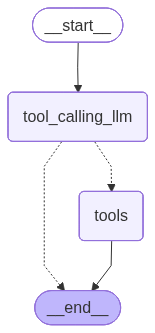

In [54]:
# Entire Chatbot With LangGraph
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

# Node definition
def tool_calling_llm(state:State):
    return {"messages":[llm1_with_tools.invoke(state["messages"])]}

# Build graph
builder = StateGraph(State)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode(tools))

builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition,
)
builder.add_edge("tools", END)


graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))


In [55]:
messages=graph.invoke({"messages":HumanMessage(content="what is RAG?")})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

what is RAG?
================================== Ai Message ==================================
Tool Calls:
  wikipedia (h1gamw1w6)
 Call ID: h1gamw1w6
  Args:
    query: Retrieval-Augmented Generation
================================= Tool Message =================================
Name: wikipedia

Page: Retrieval-augmented generation
Summary: Retrieval-augmented generation (RAG) is a technique that enables large language models (LLMs) to retrieve and incorporate new information. With RAG, LLMs do not respond to user queries until they refer to a specified set of documents. These documents supplement information from the LLM's pre-existing training data. This allows LLMs to use domain-specific and/or updated information that is not available in the training data. For example, this helps LL


In [58]:
messages=graph.invoke({"messages":HumanMessage(content="Provide me the top 10 recent AI news")})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Provide me the top 10 recent AI news
================================== Ai Message ==================================
Tool Calls:
  tavily_search (fa3nmrvzf)
 Call ID: fa3nmrvzf
  Args:
    query: top 10 recent AI news
    search_depth: advanced
    time_range: week
    topic: general
================================= Tool Message =================================
Name: tavily_search

{"query": "top 10 recent AI news", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://techcrunch.com/category/artificial-intelligence/", "title": "AI News & Artificial Intelligence - TechCrunch", "content": "### A former physician has launched Robyn, an empathetic AI companion\n\nAnton Osika In conversation at Web Summit with Connie Loizos, Lisbon, November 10, 2025\n\n### Lovable says it’s nearing 8 million users as the year-old AI coding startup eyes more corporate employees\n\nOpen AI 

In [60]:
messages=graph.invoke({"messages":HumanMessage(content="give me some papers on heart attack")})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

give me some papers on heart attack
================================== Ai Message ==================================
Tool Calls:
  pub_med (jv6rr9e0v)
 Call ID: jv6rr9e0v
  Args:
    query: heart attack
================================= Tool Message =================================
Name: pub_med

Published: 2025-11-11
Title: Recent advances in device therapies for resistant hypertension. Where do we stand?
Copyright Information: 
Summary::
INTRODUCTION: Device-based treatment of patients with resistant hypertension has become an important adjunct to medical therapy, although its place in clinical practice has not yet been fully established. The present minireview discusses the current state of affairs of such treatment modalities. We searched the literature in PubMed and MEDLINE for all relevant papers.
AREAS COVERED: Most information is available for renal denervation, baroreceptor activation therapy an